In [7]:
#load modules and libraries needed for the problem
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [9]:
#define plotting parameters for the whole notebook
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [10]:
#set likely values for parameters used in the problem
g = 9.81 #gravity
vt = 30.0 #trim velocity
CD = 1.0 / 40 #drag coefficient
CL = 1.0 #lift coefficient

#set the inital conditions for the problem
v0 = vt #start at trim velocity
theta0 = 0.0 #trajectory angle 0.0 is trim
x0 = 0.0 #horizontal position
y0 = 1000.0 #altitude of aircraft

In [11]:
#function defition for the right hand side of the $f(u)$ equation

def rhs_phugoid(u, CL, CD, g, vt):
    v, theta, x, y = u
    rhs = numpy.array([-g * math.sin(theta) - (CD / CL) * (g / vt**2) * v**2,
                       -g * (math.cos(theta) / v) +(g / vt**2) * v,
                       v * math.cos(theta),
                       v * math.sin(theta)])
    return rhs

In [12]:
#implement Euler's method in its own function
#note: the input *args is optional so this function can take 
#in a function with any number of input

def euler_step(u,f,dt,*args):
    u_new = u +dt * f(u, *args)
    return u_new

In [18]:
T = 100.0 #length of time interval
dt = 0.1 #size of the time steps
N = int(T/dt) + 1 #number of time steps

u = numpy.empty((N,4)) #array that will store the solution at each time step
u[0] = numpy.array([v0, theta0, x0, y0]) #initial conditions

for n in range(N-1): #integrate over time with euler
    u[n + 1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt) 
    #example of using the euler_step function with more inputs

In [19]:
#find the location of the aircraft at each time step
x = u[:, 2]
y = u[:, 3]

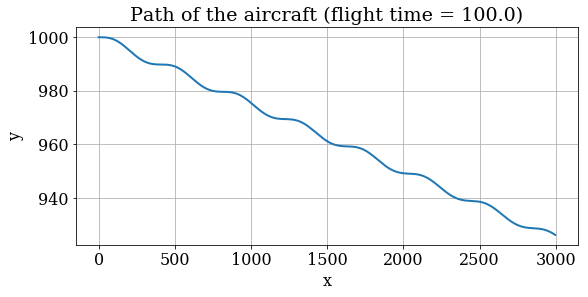

In [20]:
#plot of the aircraft's position over time
pyplot.figure(figsize=(9.0,4.0))
pyplot.title('Path of the aircraft (flight time = {})'.format(T))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.grid()
pyplot.plot(x, y, color='C0', linestyle='-', linewidth=2);

In [21]:
#to study the convergence of the solution for different timesteps
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001]

u_values = [] #empty list to hold the solutions

for dt in dt_values:
    N = int(T / dt) +1 #number of time-steps
    u = numpy.empty((N,4)) #array to store solutions
    u[0] = numpy.array([v0, theta0, x0, y0]) #initial conditions
    for n in range(N-1): #integration over time with euler
        u[n+1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)
    u_values.append(u) #store the solutions

In [23]:
def l1_diff(u_coarse, u_fine, dt):
    N_coarse = len(u_coarse)
    N_fine = len(u_fine)
    ratio = math.ceil(N_fine / N_coarse)
    diff = dt * numpy.sum(numpy.abs(u_coarse - u_fine[::ratio]))
    return diff
#defition of function to find the differences for the timesteps

In [24]:
diff_values = [] #empty list to store the difference in solutions

for i, dt in enumerate(dt_values[:-1]):
    diff = l1_diff(u_values[i][:, 2], u_values[-1][:,2], dt)
    diff_values.append(diff)

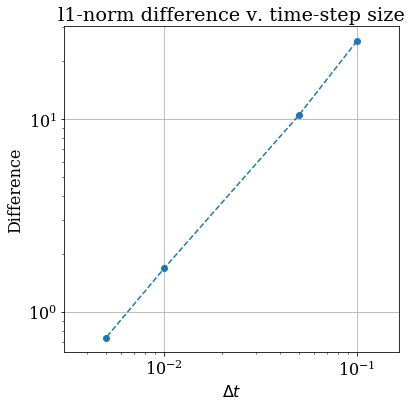

In [25]:
#plot the differences v. time steps
pyplot.figure(figsize = (6.0, 6.0))
pyplot.title('l1-norm difference v. time-step size')
pyplot.xlabel('$\Delta t$')  # set the x-axis label
pyplot.ylabel('Difference')  # set the y-axis label
pyplot.grid()
pyplot.loglog(dt_values[:-1], diff_values,
              color='C0', linestyle='--', marker='o')  # log-log plot
pyplot.axis('equal');  # make axes scale equally

In [29]:
r = 2 #refinement ratio for the time-step size
h = 0.001 #base grid size

dt_values2 = [h, r*h, r**2 *h]
u_values2 = []

for dt in dt_values2:
    N = int(T / dt) + 1 #number of time-steps
    u = numpy.empty((N,4)) #empty array to store solutions
    u[0] = numpy.array([v0, theta0, x0, y0]) #initial conditions
    
    for n in range(N-1): #time integration with euler
        u[n+1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)
        
    u_values2.append(u) #store the solution
    
f2_f1 = l1_diff(u_values2[1][:,2], u_values2[0][:,2], dt_values2[1]) 
f3_f2 = l1_diff(u_values2[2][:,2], u_values2[1][:,2], dt_values2[2]) 

p = math.log(f3_f2 / f2_f1) / math.log(r) #calculate order of convergence
print('Observed order of convergence: p = {:.3f}'.format(p))

Observed order of convergence: p = 1.014
